<a href="https://colab.research.google.com/github/IrfanPurwoSaputro/js08_uts/blob/main/js08_uts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jobsheet 8 - UTS

<b>IDENTITAS</b>

NIM: 2241727017

Nama: Irfan Purwo Saputro

Kelas: TI-4J

## Deteksi Emosi Pengguna Twitter

Deteksi emosi merupakan salah satu permasalahan yang dihadapi pada ***Natural Language Processing*** (NLP). Alasanya diantaranya adalah kurangnya dataset berlabel untuk mengklasifikasikan emosi berdasarkan data twitter. Selain itu, sifat dari data twitter yang dapat memiliki banyak label emosi (***multi-class***). Manusia memiliki berbagai emosi dan sulit untuk mengumpulkan data yang cukup untuk setiap emosi. Oleh karena itu, masalah ketidakseimbangan kelas akan muncul (***class imbalance***). Pada Ujian Tengah Semester (UTS) kali ini, Anda telah disediakan dataset teks twitter yang sudah memiliki label untuk beberapa kelas emosi. Tugas utama Anda adalah membuat model yang mumpuni untuk kebutuhan klasifikasi emosi berdasarkan teks.

### Informasi Data

Dataset yang akan digunakan adalah ****tweet_emotion.csv***. Berikut merupakan informasi tentang dataset yang dapat membantu Anda.

- Total data: 40000 data
- Label emosi: anger, boredom, empty, enthusiasm, fun, happiness, hate, love, neutral, relief, sadness, surprise, worry
- Jumlah data untuk setiap label tidak sama (***class imbalance***)
- Terdapat 3 kolom = 'tweet_id', 'sentiment', 'content'

### Penilaian UTS

UTS akan dinilai berdasaarkan 4 proses yang akan Anda lakukan, yaitu pra pengolahan data, ektraksi fitur, pembuatan model machine learning, dan evaluasi.

#### Pra Pengolahan Data

> **Perhatian**
> 
> Sebelum Anda melakukan sesuatu terhadap data Anda, pastikan data yang Anda miliki sudah "baik", bebas dari data yang hilang, menggunakan tipe data yang sesuai, dan sebagainya.
>

Data tweeter yang ada dapatkan merupakan sebuah data mentah, maka beberapa hal dapat Anda lakukan (namun tidak terbatas pada) yaitu,

1. Case Folding
2. Tokenizing
3. Filtering
4. Stemming

*CATATAN: PADA DATA TWITTER TERDAPAT *MENTION* (@something) YANG ANDA HARUS TANGANI SEBELUM MASUK KE TAHAP EKSTRAKSI FITUR*

#### Ekstrasi Fitur

Anda dapat menggunakan beberapa metode, diantaranya

1. Bag of Words (Count / TF-IDF)
2. N-gram
3. dan sebagainya

#### Pembuatan Model

Anda dibebaskan dalam memilih algoritma klasifikasi. Anda dapat menggunakan algoritma yang telah diajarkan didalam kelas atau yang lain, namun dengan catatan. Berdasarkan asas akuntabilitas pada pengembangan model machine learning, Anda harus dapat menjelaskan bagaimana model Anda dapat menghasilkan nilai tertentu.

#### Evaluasi

Pada proses evaluasi, minimal Anda harus menggunakan metric akurasi. Akan tetapi Anda juga dapat menambahkan metric lain seperti Recall, Precision, F1-Score, detail Confussion Metric, ataupun Area Under Curve (AUC).

### Lembar Pengerjaan
Lembar pengerjaan dimulai dari cell dibawah ini

## Pra Pengolahan Data
Lembar pengerjaan dimulai dari cell dibawah ini

### Load Data

Pada tahap ini kita akan loading data ke dalam data frame

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('tweet_emotions.csv')

df.head(10)

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...
6,1956968487,sadness,"I should be sleep, but im not! thinking about ..."
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down
8,1956969035,sadness,@charviray Charlene my love. I miss you
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?


### Pemeriksaan Missing Data
Memeriksa data yang hilang atau missing data

In [55]:
df.isnull().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

### Pemeriksaan Data
Memeriksa shape, jumlah data dari kolom sentiment, dan info tipe data

In [56]:
print(df.shape)
print('\n')

print(df['sentiment'].value_counts())
print('\n')

print(df.info())

(40000, 3)


neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB
None


### Pengelompokkan
Mengelompokkan data pada kolom sentimen berdasarkan emotional dari content menjadi 3 yaitu neutral ,fun, dan hate



In [57]:
df.sentiment = np.where((df.sentiment == 'neutral') |(df.sentiment == 'empty')|(df.sentiment == 'boredom')|(df.sentiment == 'surprise'),'neutral',df.sentiment)

In [58]:
df.sentiment = np.where((df.sentiment == 'fun') |(df.sentiment == 'enthusiasm') |(df.sentiment == 'happiness') | (df.sentiment == 'love') | (df.sentiment == 'relief'),'fun',df.sentiment)

In [59]:
df.sentiment = np.where((df.sentiment == 'disgust') |(df.sentiment == 'hate')| (df.sentiment == 'worry')| (df.sentiment == 'sadness')| (df.sentiment == 'anger'),'hate',df.sentiment)

In [60]:
df.sentiment.value_counts()

hate       15057
fun        13112
neutral    11831
Name: sentiment, dtype: int64

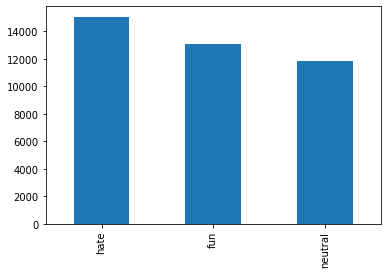

In [61]:
df['sentiment'].value_counts().plot(kind='bar')

### Penanganan Data
Menangani data dari kolom content yaitu @mention dan menjadikan data menjadi lower case atau huruf kecil

In [62]:
df['content']=df['content'].str.replace('@', '')

In [63]:
df['content']=df['content'].str.lower()

## Ekstraksi Fitur

### Penetapan Data Target

In [70]:
target=df.sentiment
data = df.drop(['sentiment'],axis=1)

df.head()

,tweet_id,sentiment,content
0,1956967341,neutral,tiffanylue i know i was listenin to bad habit...
1,1956967666,hate,layin n bed with a headache ughhhh...waitin o...
2,1956967696,hate,funeral ceremony...gloomy friday...
3,1956967789,fun,wants to hang out with friends soon!
4,1956968416,neutral,dannycastillo we want to trade with someone wh...


In [71]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
target=le.fit_transform(target)

### Pemisahan Data Train dan Data Test

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data,target,stratify=target,test_size=0.4, random_state=42)

In [73]:
from scipy.stats import itemfreq

itemfreq(y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  This is separate from the ipykernel package so we can avoid doing imports until


array([[   0, 7867],
       [   1, 9034],
       [   2, 7099]])

In [74]:
itemfreq(y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  """Entry point for launching an IPython kernel.


array([[   0, 5245],
       [   1, 6023],
       [   2, 4732]])

### Bag of Words

In [75]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train.content)
X_test_counts =count_vect.transform(X_test.content)
print('Shape of Term Frequency Matrix: ',X_train_counts.shape)

Shape of Term Frequency Matrix:  (24000, 33619)


## Model Machine Learning : Mutinomial Naive Bayes

Multinomial Naive Bayes digunakan untuk klaisfikasi yang berhubungan dengan kategori khususnya frekuensi kata yang ada pada dokumen

In [76]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(X_train_counts,y_train)
predicted = clf.predict(X_test_counts)
nb_clf_accuracy = np.mean(predicted == y_test) * 100
print(nb_clf_accuracy)

54.6125


## Evaluasi

Menggunakan matrik akurasi yaitu Confusion Matrix

In [77]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,predicted)

array([[3243, 1586,  416],
       [ 829, 4780,  414],
       [1409, 2608,  715]])